Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.8693 - loss: 0.4196 - val_accuracy: 0.9785 - val_loss: 0.0702
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9823 - loss: 0.0572 - val_accuracy: 0.9853 - val_loss: 0.0500
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - accuracy: 0.9876 - loss: 0.0389 - val_accuracy: 0.9892 - val_loss: 0.0386
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9912 - loss: 0.0271 - val_accuracy: 0.9890 - val_loss: 0.0371
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.9936 - loss: 0.0187 - val_accuracy: 0.9895 - val_loss: 0.0387
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9958 - loss: 0.0145 - val_accuracy: 0.9895 - val_loss: 0.0356
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9962 - loss: 0.0130 - val_accuracy: 0.9868 - val_loss: 0.0478
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9965 - loss: 0.0109 - 

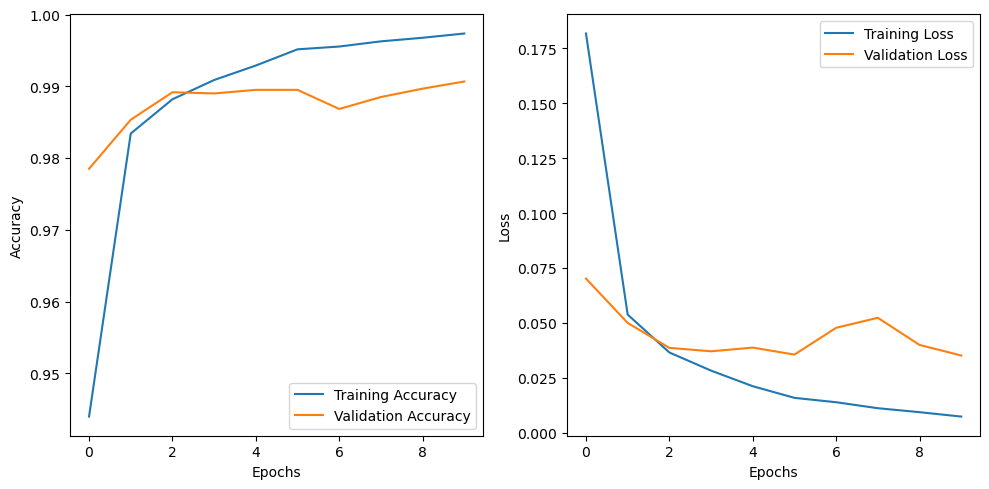

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Split training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
